<a href="https://colab.research.google.com/github/keerthanareddyyy/House-Price-Dataset/blob/main/HousePriceDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```
# 🏠 House Price Prediction

This notebook uses a simple linear regression model to predict house prices based on features like area, number of bedrooms, bathrooms, and year built.



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load dataset from CSV
df = pd.read_csv('house_prices.csv')
df.head()


,Area,Bedrooms,Bathrooms,YearBuilt,Price
0,1500,3,2,2005,300000
1,1800,4,3,2010,400000
2,2400,3,2,2000,350000
3,3000,5,4,2015,500000
4,3500,4,3,2012,450000


In [5]:
# Get basic info about dataset columns and missing values
df.info()

# Summary statistics of numeric columns
df.describe()

# Check for missing/null values in each column
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Area       5 non-null      int64
 1   Bedrooms   5 non-null      int64
 2   Bathrooms  5 non-null      int64
 3   YearBuilt  5 non-null      int64
 4   Price      5 non-null      int64
dtypes: int64(5)
memory usage: 332.0 bytes


,0
Area,0
Bedrooms,0
Bathrooms,0
YearBuilt,0
Price,0


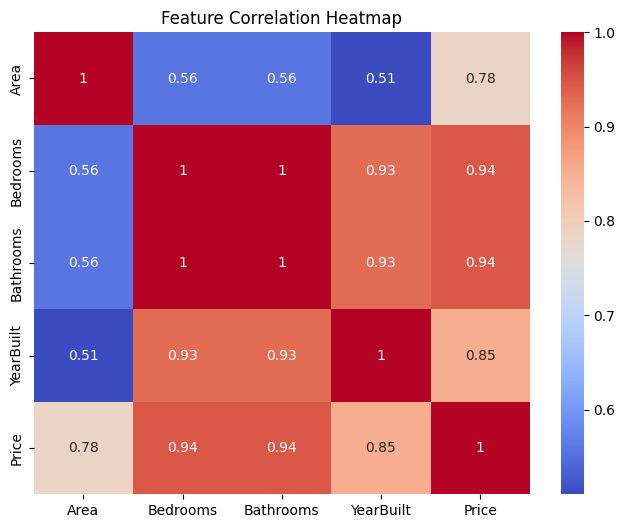

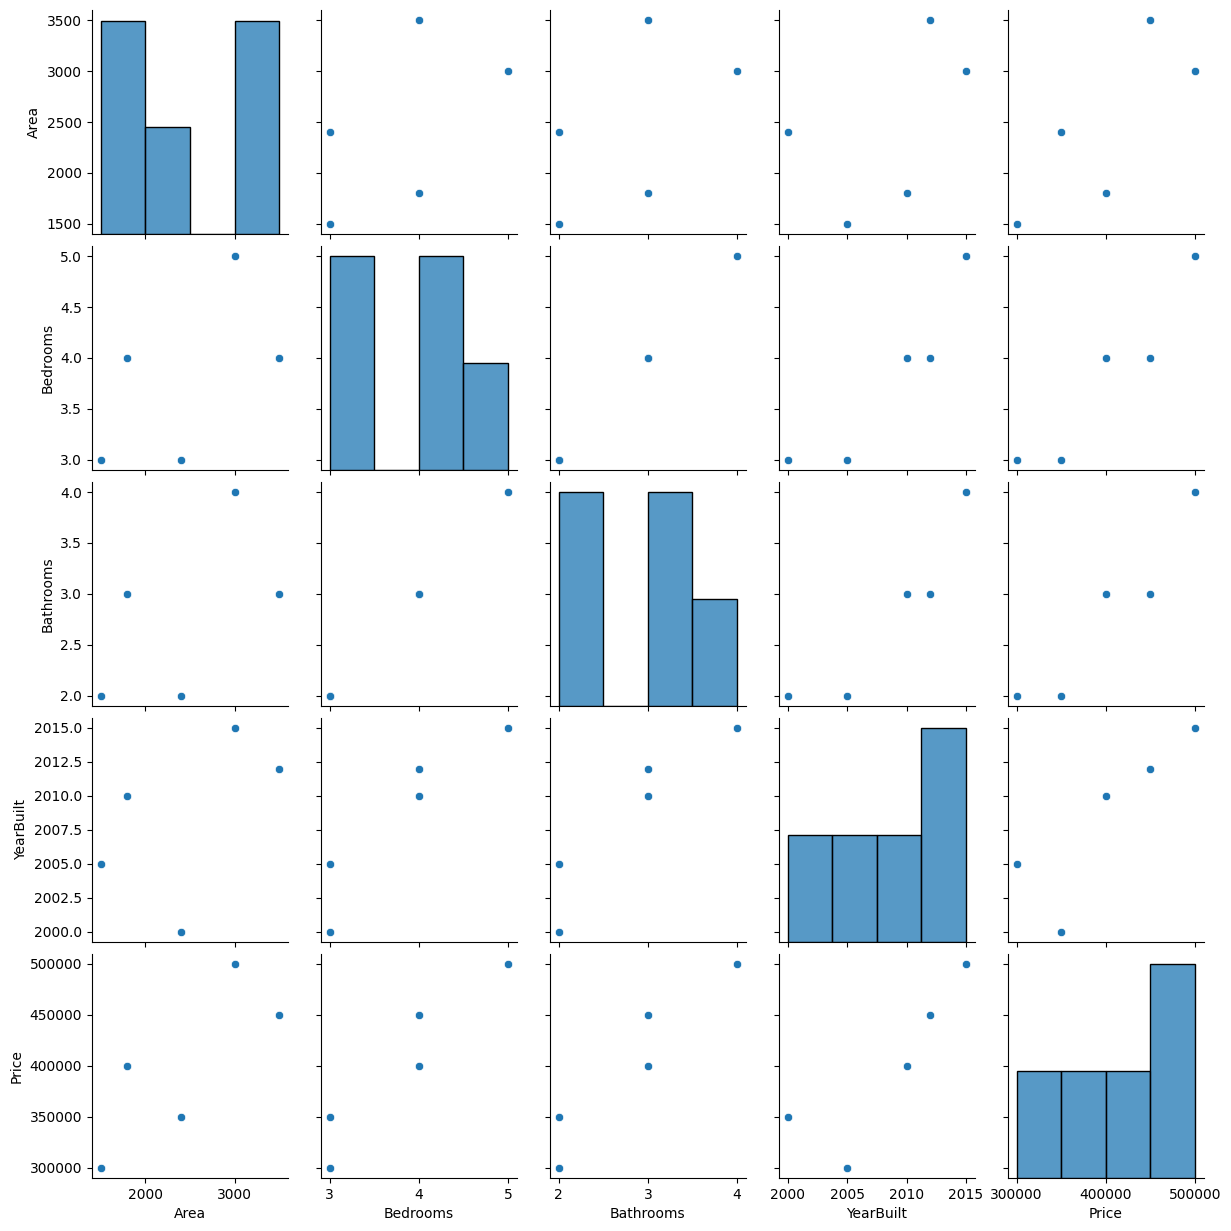

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap to see relationships between features and target
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Pairplot to visualize distributions and relationships between variables
sns.pairplot(df)
plt.show()


In [7]:
# Separate input features (X) and target variable (y)
X = df.drop('Price', axis=1)  # Features (all columns except 'Price')
y = df['Price']               # Target variable


In [12]:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)


In [10]:
from sklearn.linear_model import LinearRegression

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict house prices on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 191398865.78454185
R² Score: 0.6937618147447331


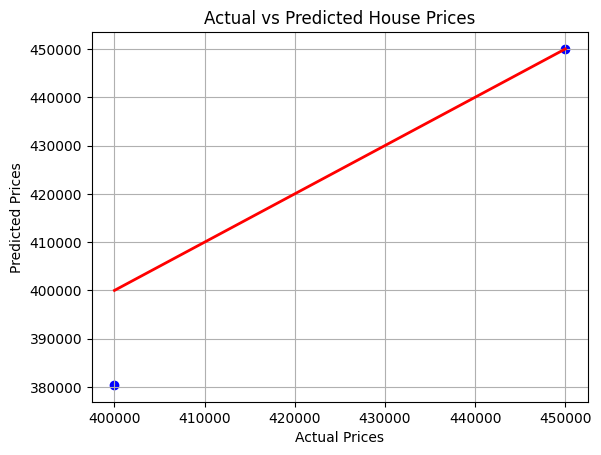

In [14]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()
